In [2]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras

np.random.seed(1)

In [9]:
# Sentinel 2 band descriptions
band_descriptions = {
    'B1': 'Aerosols, 442nm',
    'B2': 'Blue, 492nm',
    'B3': 'Green, 559nm',
    'B4': 'Red, 665nm',
    'B5': 'Red Edge 1, 704nm',
    'B6': 'Red Edge 2, 739nm',
    'B7': 'Red Edge 3, 779nm',
    'B8': 'NIR, 833nm',
    'B8A': 'Red Edge 4, 864nm',
    'B9': 'Water Vapor, 943nm',
    'B11': 'SWIR 1, 1610nm',
    'B12': 'SWIR 2, 2186nm'
}

band_wavelengths = [442, 492, 559, 665, 704, 739, 779, 833, 864, 943, 1610, 2186]

In [166]:
data_dir = '../data/training_sites'

with open(os.path.join(data_dir, "tpa_patch_histories.pkl"), 'rb') as file:
    history = pickle.load(file)
    
data = history['2019-06-01']['TPA Temesi']
rgb = np.stack((data['B4'], 
                data['B3'],
                data['B2']), axis=2)

In [171]:
data_dir = '../data'

with open(os.path.join(data_dir, "tpa_suwung_0.03_patch.pkl"), 'rb') as file:
    history = pickle.load(file)
    
data = history['2019-06-01']['TPA Regional Suwung']
rgb = np.stack((data['B4'], 
                data['B3'],
                data['B2']), axis=2)

In [172]:
pixel_vectors = []
for i in range(rgb.shape[0]):
    for j in range(rgb.shape[1]):
        pixel_vector = []
        for band in band_descriptions:
            pixel_vector.append(data[band][i][j])
        pixel_vectors.append(pixel_vector)
pixel_vectors = np.array(pixel_vectors)

In [173]:
model = keras.models.load_model('../models/model_filtered-12-07-2020.h5')
preds = model.predict(np.expand_dims(pixel_vectors, axis=-1) / 3000)[:,1]

In [178]:
pca = TSNE(n_components=1)
pca_out = pca.fit_transform(pixel_vectors)

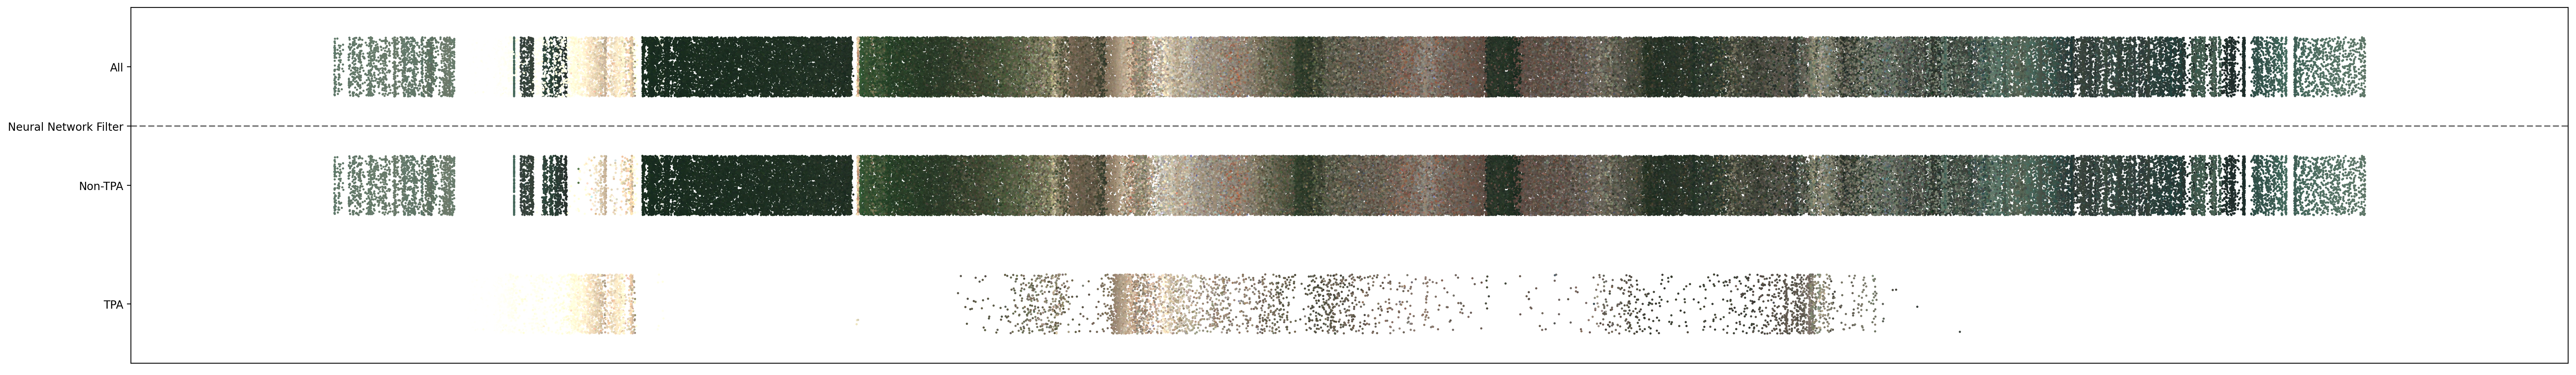

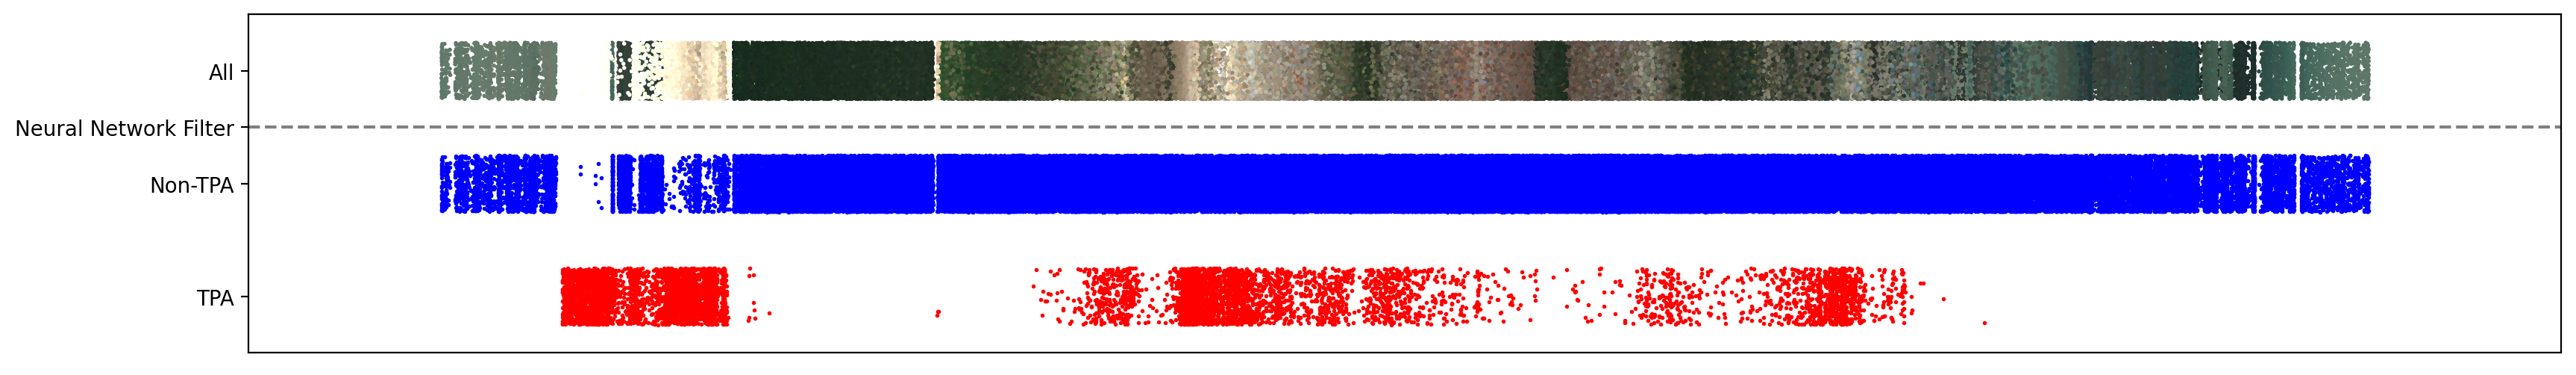

In [180]:
gamma = 0.9
r = (np.clip(pixel_vectors[:,3], None, 3000) / 3000) ** gamma
g = (np.clip(pixel_vectors[:,2], None, 3000) / 3000) ** gamma
b = (np.clip(pixel_vectors[:,1], None, 3000) / 3000) ** gamma

pixel_rgb = np.stack((r,g,b), axis = 1)
pca_range = pca_out.max() - pca_out.min()

size = 1

threshold = 0.6
plt.figure(figsize=(40, 6), dpi=200)
offset = (np.random.random(len(pca_out)) - 0.5) / 2
plt.scatter(pca_out[preds > threshold], offset[preds > threshold] + 0, color=pixel_rgb[preds > threshold], s=size)
plt.plot([pca_out.min() - 0.1 * pca_range, pca_out.max() + 0.1 * pca_range], [1.5, 1.5], '--', color='gray')
plt.scatter(pca_out[preds <= threshold], offset[preds <= threshold] + 1, color=pixel_rgb[preds <= threshold], s=size)
plt.scatter(pca_out, offset + 2, color=pixel_rgb, s=size)
plt.xticks([])
plt.yticks([0, 1, 1.5, 2], ['TPA', 'Non-TPA', 'Neural Network Filter', 'All'])
plt.xlim([pca_out.min() - 0.1 * pca_range, 
          pca_out.max() + 0.1 * pca_range])
plt.ylim([-0.5, 2.5])
plt.show()

plt.figure(figsize=(20, 3), dpi=200)
plt.scatter(pca_out[preds > threshold], offset[preds > threshold] + 0, c='r', s=size)
plt.plot([pca_out.min() - 0.1 * pca_range, pca_out.max() + 0.1 * pca_range], [1.5, 1.5], '--', color='gray')
plt.scatter(pca_out[preds <= threshold], offset[preds <= threshold] + 1, c='b', s=size)
plt.scatter(pca_out, offset + 2, color=pixel_rgb, s=size)
plt.xticks([])
plt.yticks([0, 1, 1.5, 2], ['TPA', 'Non-TPA', 'Neural Network Filter', 'All'])
plt.xlim([pca_out.min() - 0.1 * pca_range, 
          pca_out.max() + 0.1 * pca_range])
plt.ylim([-0.5, 2.5])
plt.show()

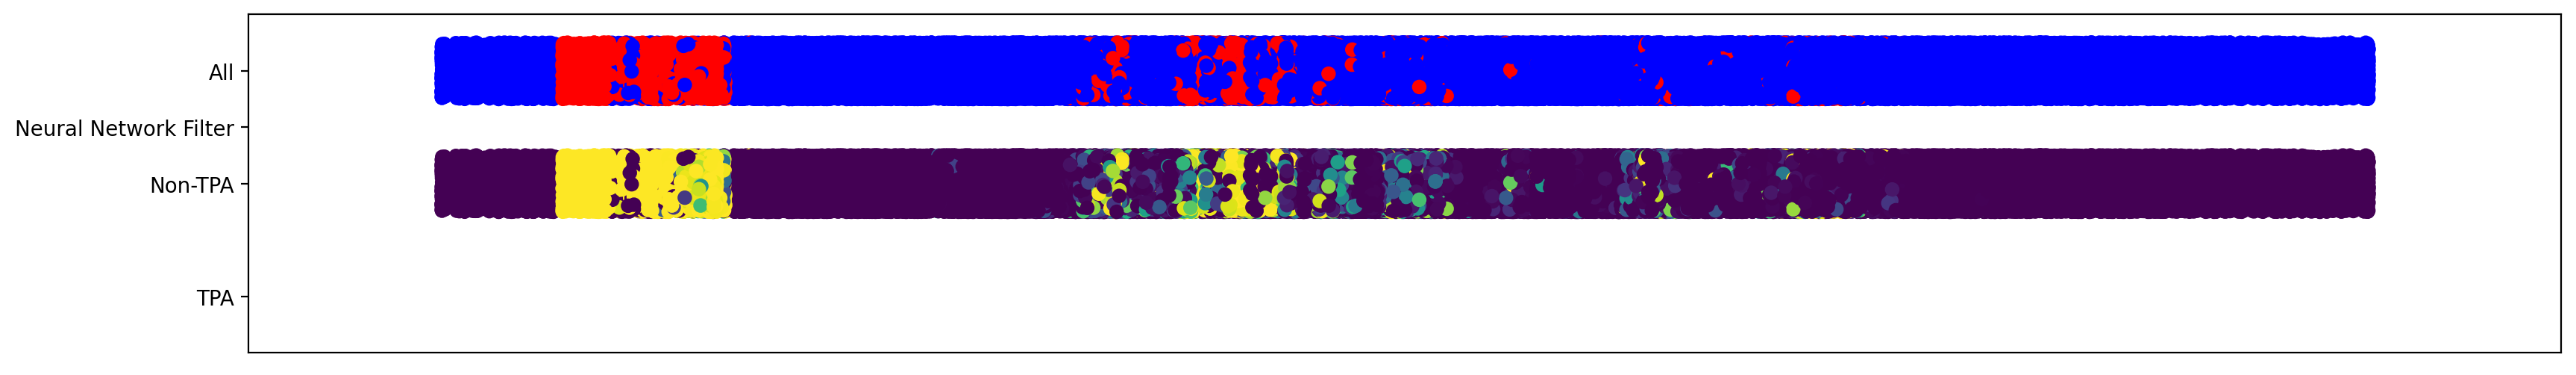

In [181]:
gamma = 0.9
r = (np.clip(pixel_vectors[:,3], None, 3000) / 3000) ** gamma
g = (np.clip(pixel_vectors[:,2], None, 3000) / 3000) ** gamma
b = (np.clip(pixel_vectors[:,1], None, 3000) / 3000) ** gamma

pixel_rgb = np.stack((r,g,b), axis = 1)
pca_range = pca_out.max() - pca_out.min()

threshold = 0.6
plt.figure(figsize=(20, 3), dpi=200)
#offset = (np.random.random(len(pca_out)) - 0.5) / 2
plt.scatter(pca_out, offset + 1, c=preds, cmap='viridis')
plt.scatter(pca_out, offset + 2, c=np.array(preds > threshold).astype('int'), cmap='bwr')
plt.xticks([])
plt.yticks([0, 1, 1.5, 2], ['TPA', 'Non-TPA', 'Neural Network Filter', 'All'])
plt.xlim([pca_out.min() - 0.1 * pca_range, 
          pca_out.max() + 0.1 * pca_range])
plt.ylim([-0.5, 2.5])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


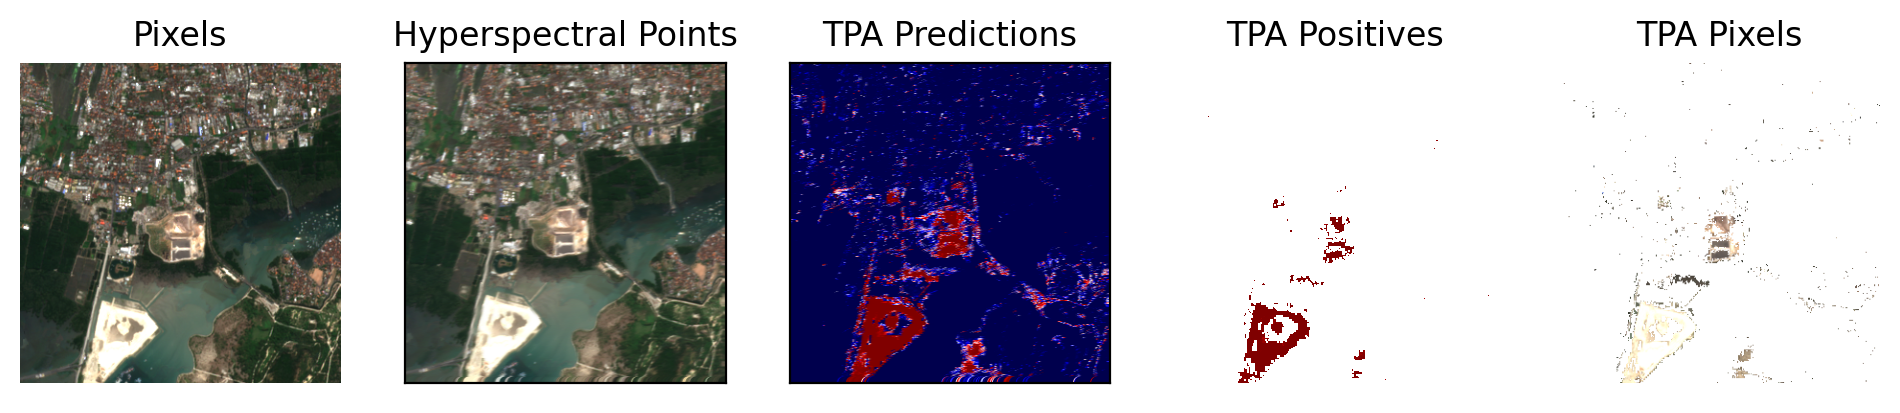

In [184]:
x = []
y = []
for i in range(rgb.shape[0]):
    for j in range(rgb.shape[1]):
        x.append(j)
        y.append(i)

model = keras.models.load_model('../models/model_filtered-12-07-2020.h5')
preds = model.predict(np.expand_dims(pixel_vectors, axis=-1) / 3000)[:,1]
        
threshold = 0.9
    
plt.figure(figsize=(12, 3), dpi=200)
plt.subplot(1,5,1)
plt.imshow(rgb / 3000)
plt.axis('off')
plt.title('Pixels')

plt.subplot(1,5,2)
plt.scatter(x, rgb.shape[0] - np.array(y), c=pixel_rgb, cmap='seismic', s=10)
plt.axis('square')
plt.xticks([])
plt.yticks([])
plt.ylim([0, rgb.shape[0] + 1])
plt.xlim([-1, rgb.shape[1]])
plt.title('Hyperspectral Points')

plt.subplot(1,5,3)
plt.scatter(x, rgb.shape[0] - np.array(y), c=preds, cmap='seismic', s=10, vmin=0, vmax=1)
plt.axis('square')
plt.xticks([])
plt.yticks([])
plt.ylim([0, rgb.shape[0] + 1])
plt.xlim([-1, rgb.shape[1]])
plt.title('TPA Predictions')

plt.subplot(1,5,4)
preds_img = np.reshape(preds, (rgb.shape[0], rgb.shape[1]))
mask = np.ma.masked_less(preds_img, threshold).mask
preds_img[mask] = np.nan
plt.imshow(preds_img, vmin=0, vmax=1, cmap='seismic')
plt.axis('off')
plt.title('TPA Positives')


preds = model.predict(np.expand_dims(pixel_vectors, axis=-1) / 3000)[:,1]
plt.subplot(1,5,5)
overlay = np.copy(rgb) / 3000
overlay[mask,:] = 1
plt.imshow(overlay, vmin=0, vmax=1, cmap='seismic')
plt.axis('off')
plt.title('TPA Pixels')

plt.show()

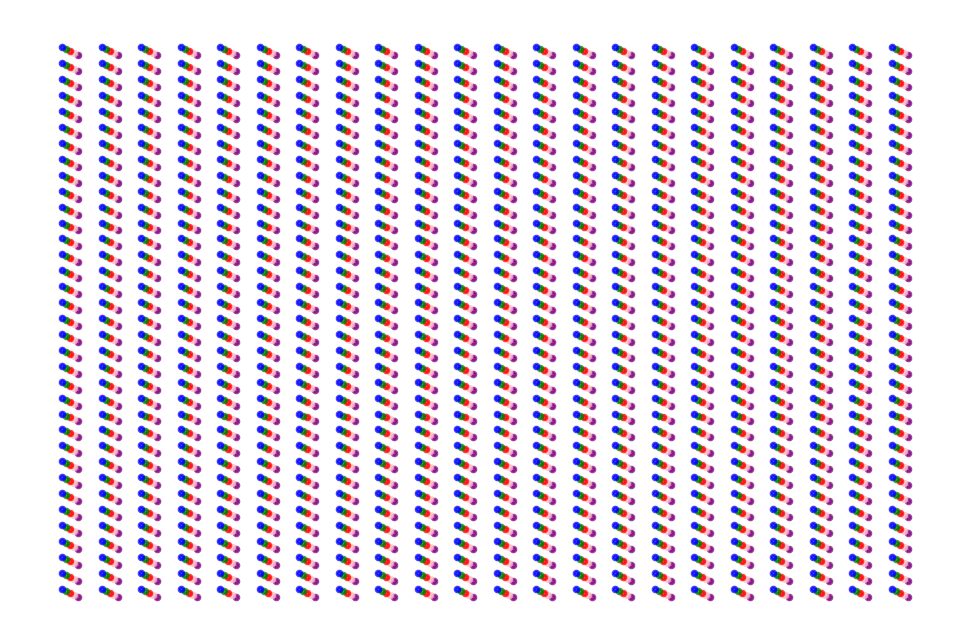

In [142]:
colors = ['purple', 'pink', 'red', 'green', 'blue']

plt.figure(dpi=200)
for i in range(5):
    plt.scatter(np.array(x) - i / 10, np.array(y) + i / 8, s=3, color=colors[i], alpha=0.75)
plt.axis('off')
plt.show()